## Microsoft Stock Price Prediction with Machine Learning

Microsoft is today one of the largest technology companies with more than 163,000 employees worldwide. It is known for the Windows operating system which is one of the most popular computer operating systems. If you want to learn how to predict the future stock prices of Microsoft, this article is for you. In this article, I will walk you through the task of Microsoft stock price Prediction with machine learning using Python.

## Microsoft Stock Price Prediction

Windows 10 is one of the operating systems that so many people love about Microsoft. When Microsoft released Windows 10, it was announced that it would be the last version of windows and then Microsoft will only work on its updates. But now Microsoft has once again garnered a lot of attention from the world as the release of Windows 11 is just around the corner. So now will be a good time to predict Microsoft’s stock price as it is getting a lot of attention.

In the section below, I will take you through the task of Microsoft stock price prediction with Machine Learning by using the Python programming language.

## Microsoft Stock Price Prediction using Python

To get started with the task of forecasting the Microsoft stock prices, you first need to have a dataset. So, to get a dataset for this task, just follow the steps mentioned below

1. Visit Yahoo Finance
2. Search for “MSFT”
3. Click on “Historical Data”
4. Click on “Download”

After completing the steps mentioned above you will find a dataset about the historical stock prices of Microsoft in your downloads folder. Now let’s get started with the task of predicting the stock prices of Microsoft by importing the necessary Python libraries and the dataset

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline


## Data Collaction

In [60]:
sns.set()
plt.style.use('fivethirtyeight')

data = pd.read_csv("Data\MSFT.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-15,282.000000,282.510010,279.829987,281.029999,278.753845,22604200
1,2021-07-16,282.070007,284.100006,279.459991,280.750000,278.476105,26186800
2,2021-07-19,278.929993,280.369995,274.450012,277.010010,274.766418,32935600
3,2021-07-20,278.029999,280.970001,276.260010,279.320007,277.057678,26259700
4,2021-07-21,278.899994,281.519989,277.290009,281.399994,279.120850,24364300


In [61]:
print(data.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2021-07-15  282.000000  282.510010  279.829987  281.029999  278.753845   
1  2021-07-16  282.070007  284.100006  279.459991  280.750000  278.476105   
2  2021-07-19  278.929993  280.369995  274.450012  277.010010  274.766418   
3  2021-07-20  278.029999  280.970001  276.260010  279.320007  277.057678   
4  2021-07-21  278.899994  281.519989  277.290009  281.399994  279.120850   

     Volume  
0  22604200  
1  26186800  
2  32935600  
3  26259700  
4  24364300  


## Data Pre-processing

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [63]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,296.368458,299.468616,292.799683,296.255217,295.042876,2.969262e+07
std,24.451507,24.097511,24.566750,24.385315,23.950618,1.108364e+07
min,243.860001,245.740005,241.509995,242.259995,242.259995,1.390020e+07
25%,282.100006,286.420013,278.410004,280.809998,279.868134,2.236410e+07
50%,296.220001,298.720001,293.489990,296.029999,294.732697,2.816360e+07
75%,309.630005,312.380005,306.459991,310.200012,308.833160,3.456930e+07
max,344.619995,349.670013,342.200012,343.109985,341.606384,9.042890e+07


In [64]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In this dataset, the Close column contains the values whose future values we want to predict. So let’s have a closer look at the historical close prices of Microsoft’s stock price

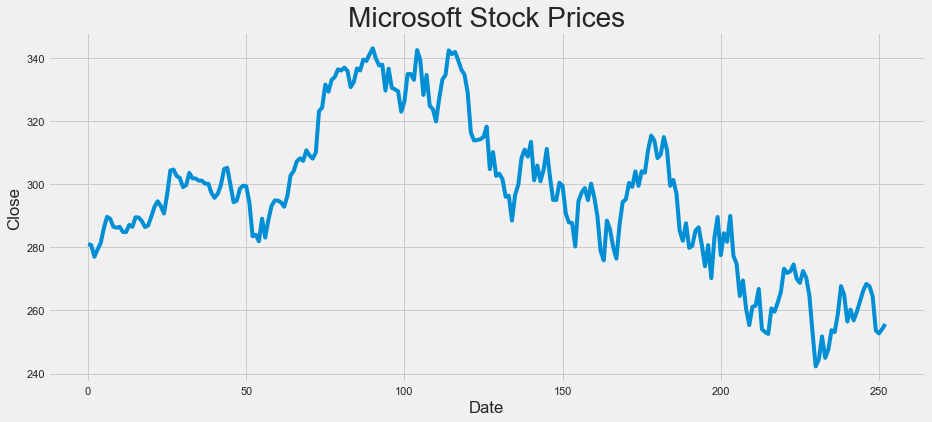

In [65]:
plt.figure(figsize=(14, 6))
plt.title("Microsoft Stock Prices", fontsize=28)
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

Now let’s have a look at the correlation between the features of this dataset

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.994324  0.991939  0.982551   0.982054 -0.096476
High       0.994324  1.000000  0.991229  0.991285   0.991509 -0.064280
Low        0.991939  0.991229  1.000000  0.992136   0.991101 -0.162438
Close      0.982551  0.991285  0.992136  1.000000   0.999684 -0.119230
Adj Close  0.982054  0.991509  0.991101  0.999684   1.000000 -0.113215
Volume    -0.096476 -0.064280 -0.162438 -0.119230  -0.113215  1.000000


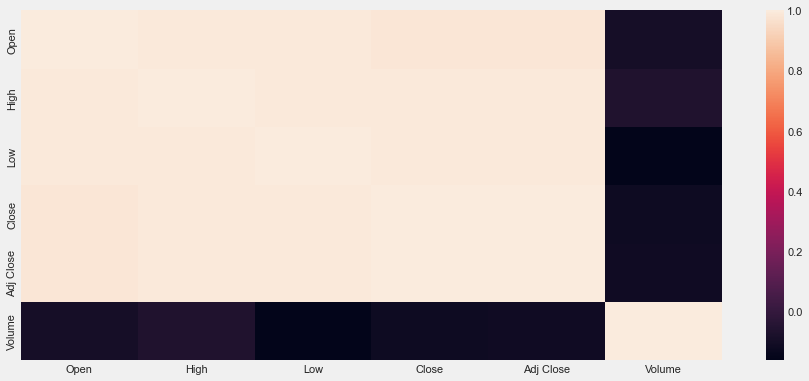

In [66]:
print(data.corr())
plt.figure(figsize=(14, 6))
sns.heatmap(data.corr())
plt.show()

Now I’ll prepare the data to fit into the machine learning model. In this step, I will first add the most important features to x and the target column to y, and then I will divide the dataset into training and test sets

## Feature Selection

In [67]:
feature = data[["Open", "High", "Low"]]
target = data["Close"]
feature = feature.to_numpy()
target = target.to_numpy()
target = target.reshape(-1, 1)

## Spliting Data

In [68]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.2, random_state=42)

Now let’s use the Decision Tree Regression Algorithm to train the Microsoft Stock Price prediction model and have a look at the predicted stock prices for the next 5 days

## Choose The Model

In [69]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

DecisionTreeRegressor()

## Model Score

In [70]:
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0      266.820007
1      289.049988
2      333.100006
3      279.829987
4      339.399994


## Summary

So this is how you can predict the stock prices of Microsoft with Machine Learning by using the Python programming language. Microsoft has once again garnered a lot of attention from the world as the release of Windows 11 is just around the corner. So this will be a good time to predict Microsoft’s stock price as it is getting a lot of attention. I hope you liked this article on the task of Microsoft Stock Price Prediction with Machine Learning using Python. Feel free to ask your valuable questions in the comments section below.

# Sheikh Rasel Ahmed

##### Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast

##### LinkedIn - https://www.linkedin.com/in/shekhnirob1

##### GitHub - https://github.com/Rasel1435

##### Behance - https://www.behance.net/Shekhrasel2513